# Project 2 : Ames Housing Data and Kaggle Challenge

## Model Tuning

#### This time, I change my approach to select the features, as lasso performs as an absolute shrinkage and selection operator, why not I use the lasso model to screen for the features. 

In [1]:
## Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error
sns.set_style('whitegrid')
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### 1. Load the Clean Traindata set

In [2]:
#read the csv file from relative path
traindata=pd.read_csv(r'C:\Users\User\materials\project_2\datasets\traindata_clean.csv')

#### 2. Split the columns to numberic and catagorical columns

In [3]:
#get an list contain all numberic columns
train_numberic_column=traindata._get_numeric_data().columns
#get an list of all columns name
train_columns=traindata.columns

In [4]:
#write an loop to get a list of catergory columns
train_category_columns=[]
for x in train_columns:
    if x not in train_numberic_column:
        train_category_columns.append(x)

#### 3. One-hot encoded categorical variables

In [5]:
#convert the categorical variable to one-hot encoded
traindata=traindata[train_numberic_column].join(pd.get_dummies(traindata[train_category_columns]),how="outer")

#### 4. Create our features matrix X and target vector y

In [6]:
#creat the list contain all the features against the Target
features = [col for col in traindata._get_numeric_data().columns if col != 'SalePrice']
#creat feature matrix X
X = traindata[features]
#creat target vector y
y = traindata['SalePrice']

#### 5. Scaling 

In [7]:
ss = StandardScaler()
#fit standardScaler to X_train
ss.fit(X)
#transform the data for both X_train and X_test
X = ss.transform(X)

#### 7. Instantiate our models
I will be evaluating LinearRegression, LassoCV and RidgeCV

In [8]:
#create instances for Lasso
lasso = LassoCV(n_alphas=300)

#### 8. Use cross_val_score to evaluate all above 3 models

In [9]:
##Cross Val for Lasso regression model
lasso_scores = cross_val_score(lasso, X, y, cv=5)
#calculate R2
lasso_scores

array([0.90879842, 0.92903541, 0.77202782, 0.92181335, 0.8256442 ])

## Screening for the features

In [10]:
#fit X_train, y_train with lasso model
lasso.fit(X, y)

LassoCV(n_alphas=300)

In [11]:
lasso.score(X,y)

0.9312598718154418

In [12]:
#select the features that coef is not 0
columns=[]
for i in range(len(lasso.coef_)):
    if lasso.coef_[i]!=0:
        columns.append(traindata.columns[i])

#### Load the test data

In [13]:
#read the csv file from relative path
testdata=pd.read_csv(r'C:\Users\User\materials\project_2\datasets\testdata_clean.csv')

#### Split the test data columns to numberic and catagorical columns

In [14]:
#get an list contain all numberic columns
test_numberic_column=testdata._get_numeric_data().columns
#get an list of all columns name
test_columns=testdata.columns

In [15]:
#write an loop to get a list of catergory columns
test_category_columns=[]
for x in test_columns:
    if x not in test_numberic_column:
        test_category_columns.append(x)

#### One-hot encoded categorical variables

In [16]:
#convert the categorical variable to one-hot encoded
testdata=testdata[test_numberic_column].join(pd.get_dummies(testdata[test_category_columns]),how="outer")

#### Select the features are existed in testdata set

In [17]:
col=[]
for x in columns:
    if x in testdata.columns:
       col.append(x)

## Create our features matrix X and target vector y

In [18]:
#creat matrix X
Xm=traindata[col]
ym=traindata['SalePrice']

## Use the train_test_split  function to split our X and y variables into a training set and a test set

In [19]:
#split the data to train and test set
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, random_state=42)

## Scaling

In [20]:
ss = StandardScaler()
#fit standardScaler to X_train
ss.fit(Xm_train)
#transform the data for both X_train and X_test
Xm_train = ss.transform(Xm_train)
Xm_test = ss.transform(Xm_test)

## Instantiate our models

In [21]:
#create instances for linearRegression
lr = LinearRegression()

In [22]:
#create instances for Lasso
lasso = LassoCV(n_alphas=300)

In [23]:
#create instance for ridge
ridge = RidgeCV(alphas=np.linspace(.1, 0.2, 100))

## K fold cross validation
#### This time we get a better R2 score compare to previous approach, and the R2 score seems to be more consistant during the cross validation

In [24]:
#Cross Val for linear regression
lr_scores = cross_val_score(lr, Xm_train, ym_train, cv=5)
#calculate R2
lr_scores

array([-6.67952168e+25,  8.75565843e-01,  8.83482608e-01,  8.13122420e-01,
       -1.89669748e+24])

In [25]:
#Cross Val for Ridge regression
ridge_scores = cross_val_score(ridge, Xm_train, ym_train, cv=5)
#calculate R2
ridge_scores

array([0.88473797, 0.87557061, 0.88348824, 0.81315266, 0.83894666])

In [26]:
##Cross Val for Lasso regression model
lasso_scores = cross_val_score(lasso, Xm_train, ym_train, cv=5)
#calculate R2
lasso_scores

array([0.8857587 , 0.87623144, 0.88538881, 0.81460982, 0.79496533])

## Model fit and Evaluation
#### Ridge is the best model to fit as it has a higher mean R2 score and more consistent R2 values during cross-validation. This model produces a smaller MSE by ridge compare to the previous approach. The residual distribution is close to normal distribution. And Predicted value closer to the actual value. 

In [27]:
#fit the lasso model
ridge.fit(Xm_train, ym_train)

RidgeCV(alphas=array([0.1       , 0.1010101 , 0.1020202 , 0.1030303 , 0.1040404 ,
       0.10505051, 0.10606061, 0.10707071, 0.10808081, 0.10909091,
       0.11010101, 0.11111111, 0.11212121, 0.11313131, 0.11414141,
       0.11515152, 0.11616162, 0.11717172, 0.11818182, 0.11919192,
       0.12020202, 0.12121212, 0.12222222, 0.12323232, 0.12424242,
       0.12525253, 0.12626263, 0.12727273, 0.12828283, 0.12929293,
       0.1303030...
       0.16565657, 0.16666667, 0.16767677, 0.16868687, 0.16969697,
       0.17070707, 0.17171717, 0.17272727, 0.17373737, 0.17474747,
       0.17575758, 0.17676768, 0.17777778, 0.17878788, 0.17979798,
       0.18080808, 0.18181818, 0.18282828, 0.18383838, 0.18484848,
       0.18585859, 0.18686869, 0.18787879, 0.18888889, 0.18989899,
       0.19090909, 0.19191919, 0.19292929, 0.19393939, 0.19494949,
       0.1959596 , 0.1969697 , 0.1979798 , 0.1989899 , 0.2       ]))

In [28]:
#calculate R2 score for train set
ridge.score(Xm_train, ym_train)

0.8829644693048169

In [29]:
#calculate the R2 Score for test set
ridge.score(Xm_test, ym_test)

0.895786541803412

In [30]:
#make prediction for test set
prediction =ridge.predict(Xm_test)

Text(0.5, 1.0, 'Method 2 Predicted VS Actual')

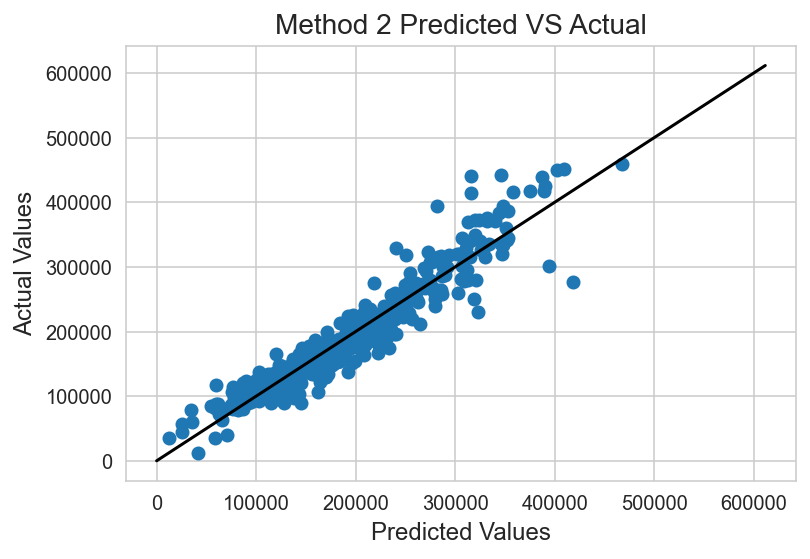

In [31]:
#plot graph for Test set for Predicted value vs actual value
plt.scatter(prediction,ym_test)
#plot the ideal fit line
plt.plot([0, np.max(y)], [0, np.max(y)], c = 'k')
#set the Xlabel
plt.xlabel("Predicted Values",fontsize=12)
#set the y label
plt.ylabel("Actual Values",fontsize=12)
#set the title
plt.title("Method 2 Predicted VS Actual",fontsize=14)

In [32]:
#calculate MSE
mean_squared_error(ym_test,prediction)

639873210.5582736

In [33]:
#calculate the residual
residual=ym_test-prediction

Text(0.5, 1.0, 'Method 2 Residual Histogram')

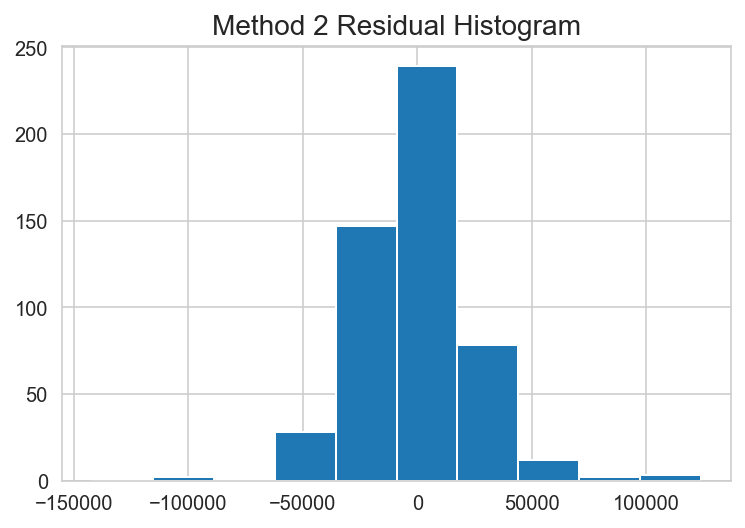

In [34]:
#plot the histogram of residual
residual.hist()
#set the title
plt.title("Method 2 Residual Histogram",fontsize=14)

Text(0.5, 1.0, 'coef distribution(1-20)')

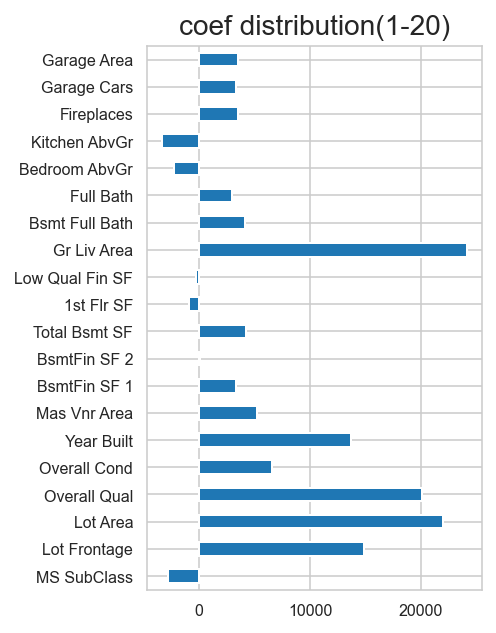

In [35]:
#plot the coef bar chart
pd.Series(ridge.coef_[:20], index=col[:20]).plot.barh(figsize=(3, 5),fontsize=8)
#set the title
plt.title("coef distribution(1-20)",fontsize=14)

Text(0.5, 1.0, 'coef distribution(20-40)')

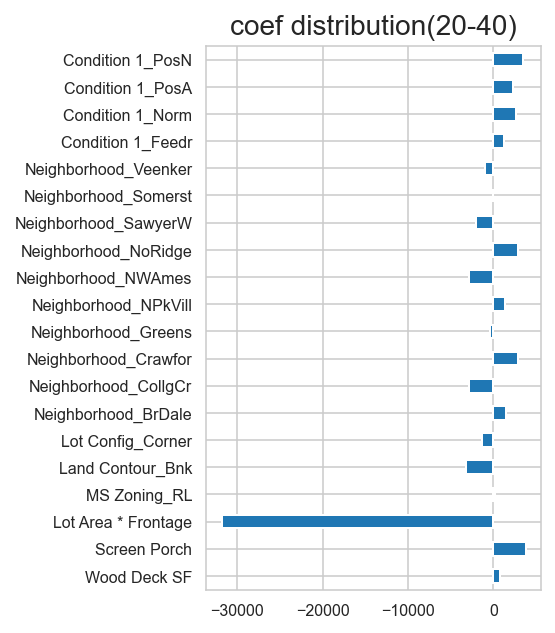

In [36]:
#plot the coef bar chart
pd.Series(ridge.coef_[20:40], index=col[20:40]).plot.barh(figsize=(3, 5),fontsize=8)
#set the title
plt.title("coef distribution(20-40)",fontsize=14)

Text(0.5, 1.0, 'coef distribution(40-65)')

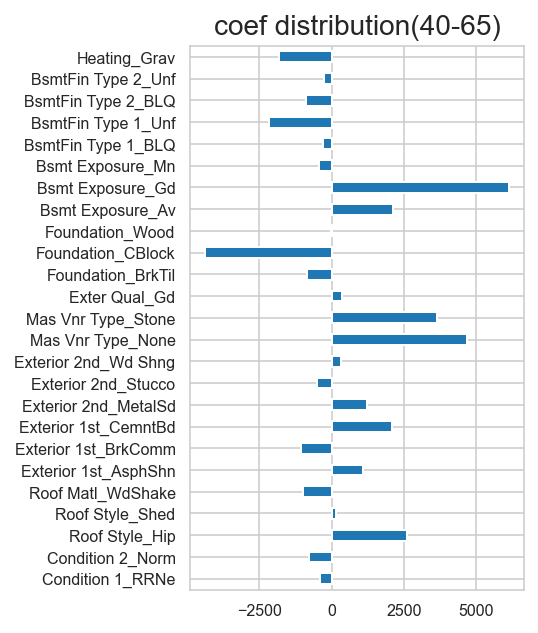

In [37]:
#plot the coef bar chart
pd.Series(ridge.coef_[40:65], index=col[40:65]).plot.barh(figsize=(3, 5),fontsize=8)
#set the title
plt.title("coef distribution(40-65)",fontsize=14)

Text(0.5, 1.0, 'coef distribution(65-end)')

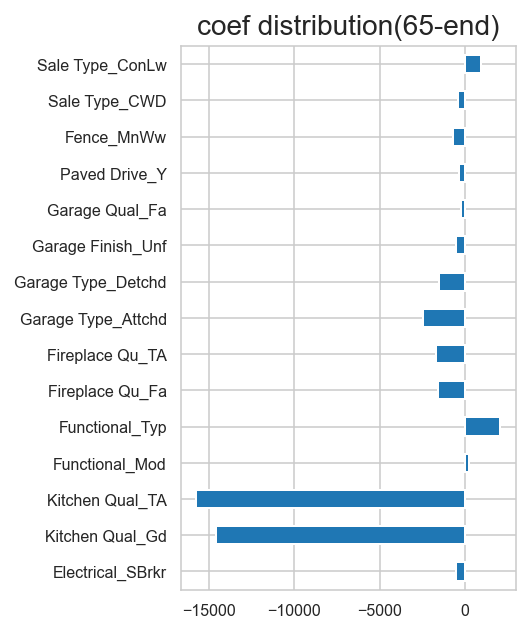

In [38]:
#plot the coef bar chart
pd.Series(ridge.coef_[65:], index=col[65:]).plot.barh(figsize=(3, 5),fontsize=8)
#set the title
plt.title("coef distribution(65-end)",fontsize=14)

## Kaggle_Submissions

In [39]:
#creat matrix x for test data set
testdata=testdata[col]

#### Scaled

In [40]:
ss = StandardScaler()
#fit standardScaler to X_train
ss.fit(testdata)
#transform the data for both X_train and X_test
testdata = ss.transform(testdata)

#### Predict the sales price in test data set

In [41]:
submission_prediction2 =ridge.predict(testdata)

#### Adjust to the suitable format for submission

In [42]:
#creat dataframe
submission_prediction2=pd.DataFrame(submission_prediction2)

In [43]:
#read the csv file from relative path
testdata1=pd.read_csv(r'C:\Users\User\materials\project_2\datasets\test.csv')

In [44]:
#set the ID
submission_prediction2["Id"]=testdata1["Id"]

In [45]:
#rename the column
submission_prediction2=submission_prediction2.rename(columns={0:"SalePrice"})

In [46]:
#sort according to "Id"
submission_prediction2=submission_prediction2.sort_values(by='Id', ascending=True)

In [47]:
#save the prediction result
submission_prediction2.to_csv(r'C:\Users\User\materials\project_2\datasets\submission_prediction_2.csv', index=False)

## Two method comparision

During the Feature engineering, there are two methods I used to select the features for modeling. The first method is to manually choose the features by evaluating their correlation coefficients with SalesPrice and manually combine/drop the variables contain multi-collinear. The second method I use lasso model as a feature-pre-screening tool. There are three models: linear regression, Ridge, and lasso are used for each method. In method 1, lasso gave the best performance among the three models. In method 2, Ridge provides the best performance among the three models.

|               |Method 1 lasso |Method2 ridge  |
|--------       |----------     |---------------|
| Train R2 score|  0.80         |  0.88         |  
| Test R2 score |  0.86         |  0.90         |
| MSE           |843694734      |639873210      |   

The method one lasso R2 score for Train and Test data set is 0.80 and 0.86 scores. Method 2 ridge R2 score for train and test data set are 0.88 and 0.9, respectively. Their results do not seem bad. However, Method one lasso model appears the overfitting as the higher variance between train and test set R2 score. The MSE for method one is also higher than method two

I also compared the prediction graph and residual plot of these two methods. The result shows method two lasso model has better accuracy, better ability to generalize new data, and its R2 score is more consistent during the k fold cross-validation and train/test R2 score evaluation. However, method 1 shows high variance during the k fold cross-validation. Also, in the Kaggle competition submission, the predicted value generated by method 1 scored around 44364308615, which is a terrible score, but method 2 scored around 29416, which is much better than method 1. 